In [223]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('float_format', '{:.3f}'.format)
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from statsmodels.genmod.generalized_linear_model import GLM
from pandas.plotting import scatter_matrix
from scipy.stats import zscore, iqr, median_abs_deviation
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Exploration of the data

In [224]:
#import data from
df = pd.read_csv('exoplanets.csv', sep=',', header=0)
# Print the shape of the dataset
print(df.shape)
# Print the first 100 rows of the dataset
df.head(100)

(9564, 49)


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.000,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.000,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.000,4.544,0.044,-0.176,0.868,0.233,-0.078,297.005,48.134,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.000,4.564,0.053,-0.168,0.791,0.201,-0.067,285.535,48.285,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.000,4.438,0.070,-0.210,1.046,0.334,-0.133,288.755,48.226,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3734868,K00805.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.053,0,1,0,0,...,-169.000,4.359,0.180,-0.180,1.024,0.280,-0.186,287.697,38.886,15.646
96,3832474,K00806.01,Kepler-30 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-120.000,4.556,0.014,-0.081,0.867,0.079,-0.037,285.284,38.947,15.403
97,8395660,K00116.03,Kepler-106 b,CONFIRMED,CANDIDATE,0.950,0,0,0,0,...,-117.000,4.406,0.090,-0.110,1.012,0.154,-0.103,300.864,44.338,12.882
98,3832474,K00806.02,Kepler-30 c,CONFIRMED,CANDIDATE,0.745,0,0,0,0,...,-120.000,4.556,0.014,-0.081,0.867,0.079,-0.037,285.284,38.947,15.403


In [225]:
print(df.columns)

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')


In [226]:
#Rename df columns
df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod_days',
'koi_period_err1':'OrbitalPeriodUpperUnc_days',
'koi_period_err2':'OrbitalPeriodLowerUnc_days',
'koi_time0bk':'TransitEpoch_BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc_BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc_BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration_hrs',
'koi_duration_err1':'TransitDurationUpperUnc_hrs',
'koi_duration_err2':'TransitDurationLowerUnc_hrs',
'koi_depth':'TransitDepth_ppm',
'koi_depth_err1':'TransitDepthUpperUnc_ppm',
'koi_depth_err2':'TransitDepthLowerUnc_ppm',
'koi_prad':'PlanetaryRadius_Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc_Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc_Earthradii',
'koi_teq':'EquilibriumTemperatureK',
'koi_teq_err1':'EquilibriumTemperatureUpperUncK',
'koi_teq_err2':'EquilibriumTemperatureLowerUncK',
'koi_insol':'InsolationFlux_Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc_Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc_Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumber',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperatureK',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUncK',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUncK',
'koi_slogg':'StellarSurfaceGravity_log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc_log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc_log10(cm/s**2)',
'koi_srad':'StellarRadius_Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc_Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc_Solarradii',
'ra':'RA_decimaldegrees',
'dec':'Dec_decimaldegrees',
'koi_kepmag':'Kepler-band_mag'
})
df.head()

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,...,StellarEffectiveTemperatureLowerUncK,StellarSurfaceGravity_log10(cm/s**2),StellarSurfaceGravityUpperUnc_log10(cm/s**2),StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.000,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.000,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.000,4.544,0.044,-0.176,0.868,0.233,-0.078,297.005,48.134,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.000,4.564,0.053,-0.168,0.791,0.201,-0.067,285.535,48.285,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.000,4.438,0.070,-0.210,1.046,0.334,-0.133,288.755,48.226,15.509


In [227]:
# Print the data types of the dataset
df.dtypes

KepID                                                      int64
KOIName                                                   object
KeplerName                                                object
ExoplanetArchiveDisposition                               object
DispositionUsingKeplerData                                object
DispositionScore                                         float64
NotTransit-LikeFalsePositiveFlag                           int64
koi_fpflag_ss                                              int64
CentroidOffsetFalsePositiveFlag                            int64
EphemerisMatchIndicatesContaminationFalsePositiveFlag      int64
OrbitalPeriod_days                                       float64
OrbitalPeriodUpperUnc_days                               float64
OrbitalPeriodLowerUnc_days                               float64
TransitEpoch_BKJD                                        float64
TransitEpochUpperUnc_BKJD                                float64
TransitEpochLowerUnc_BKJD

In [228]:
# Analysing type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  9564 non-null   int64  
 1   KOIName                                                9564 non-null   object 
 2   KeplerName                                             2359 non-null   object 
 3   ExoplanetArchiveDisposition                            9564 non-null   object 
 4   DispositionUsingKeplerData                             9564 non-null   object 
 5   DispositionScore                                       8054 non-null   float64
 6   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 7   koi_fpflag_ss                                          9564 non-null   int64  
 8   CentroidOffsetFalsePositiveFlag                 

(array([[<Axes: title={'center': 'KepID'}>,
         <Axes: title={'center': 'DispositionScore'}>,
         <Axes: title={'center': 'NotTransit-LikeFalsePositiveFlag'}>,
         <Axes: title={'center': 'koi_fpflag_ss'}>,
         <Axes: title={'center': 'CentroidOffsetFalsePositiveFlag'}>,
         <Axes: title={'center': 'EphemerisMatchIndicatesContaminationFalsePositiveFlag'}>,
         <Axes: title={'center': 'OrbitalPeriod_days'}>],
        [<Axes: title={'center': 'OrbitalPeriodUpperUnc_days'}>,
         <Axes: title={'center': 'OrbitalPeriodLowerUnc_days'}>,
         <Axes: title={'center': 'TransitEpoch_BKJD'}>,
         <Axes: title={'center': 'TransitEpochUpperUnc_BKJD'}>,
         <Axes: title={'center': 'TransitEpochLowerUnc_BKJD'}>,
         <Axes: title={'center': 'ImpactParamete'}>,
         <Axes: title={'center': 'ImpactParameterUpperUnc'}>],
        [<Axes: title={'center': 'ImpactParameterLowerUnc'}>,
         <Axes: title={'center': 'TransitDuration_hrs'}>,
        

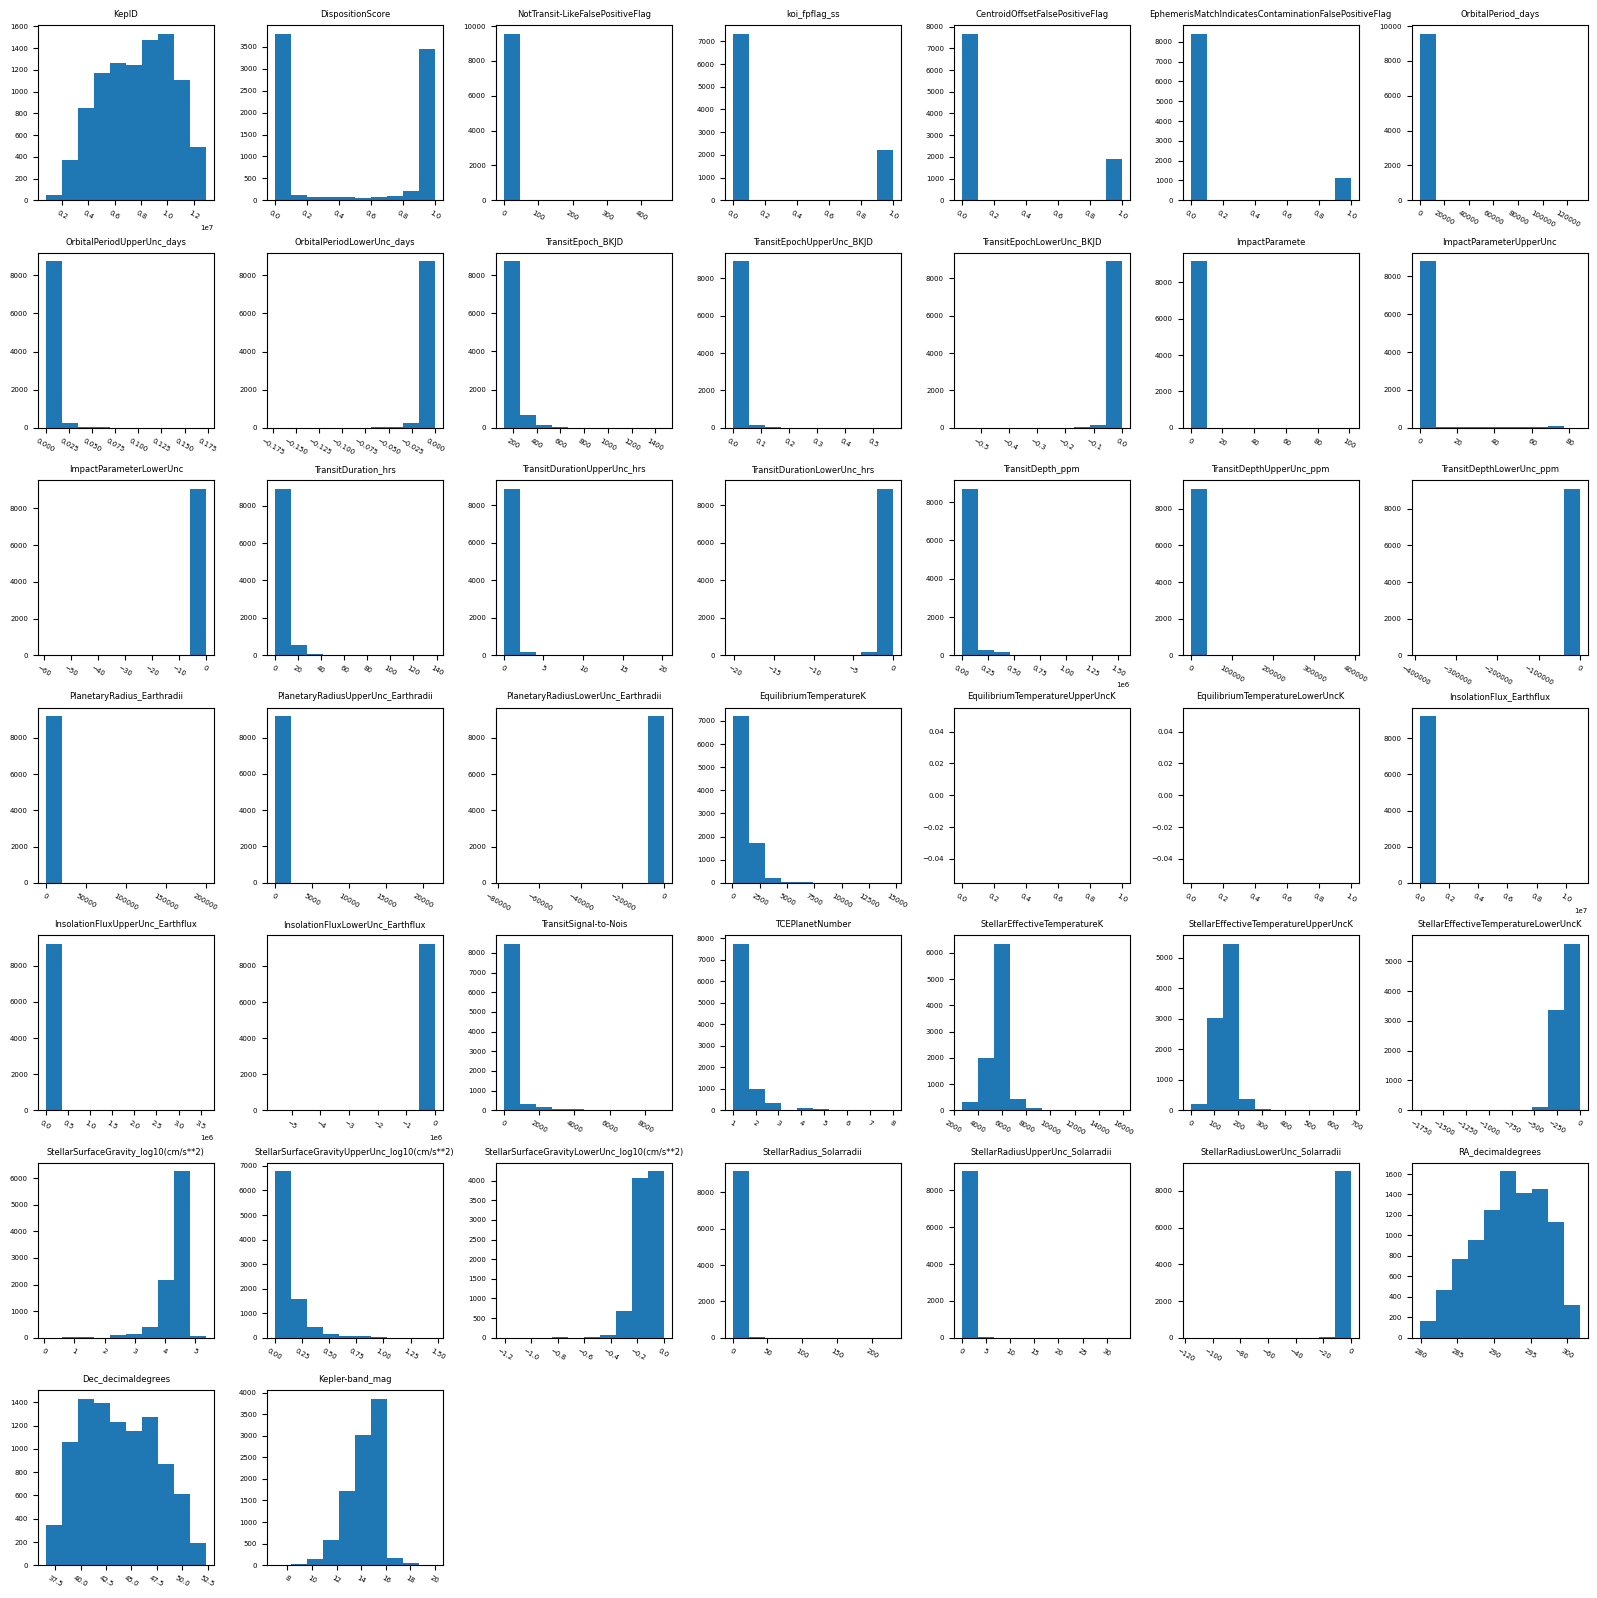

In [229]:
%matplotlib inline
# Plot histogram grid to check how data is distributed
df.hist(figsize=(20,20), xrot=-30, grid=False), 
plt.show()

In [230]:
#Decribe the the columns to get a better understanding of the data
df.describe()

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod_days,OrbitalPeriodUpperUnc_days,OrbitalPeriodLowerUnc_days,TransitEpoch_BKJD,...,StellarEffectiveTemperatureLowerUncK,StellarSurfaceGravity_log10(cm/s**2),StellarSurfaceGravityUpperUnc_log10(cm/s**2),StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag
count,9564.000,8054.000,9564.000,9564.000,9564.000,9564.000,9564.000,9110.000,9110.000,9564.000,...,9081.000,9201.000,9096.000,9096.000,9201.000,9096.000,9096.000,9564.000,9564.000,9563.000
mean,7690628.327,0.481,0.209,0.233,0.198,0.120,75.671,0.002,-0.002,166.183,...,-162.265,4.310,0.121,-0.143,1.729,0.362,-0.395,292.060,43.810,14.265
std,2653459.081,0.477,4.767,0.423,0.398,0.325,1334.744,0.008,0.008,67.919,...,72.746,0.433,0.133,0.085,6.127,0.931,2.168,4.767,3.601,1.385
min,757450.000,0.000,0.000,0.000,0.000,0.000,0.242,0.000,-0.173,120.516,...,-1762.000,0.047,0.000,-1.207,0.109,0.000,-116.137,279.853,36.577,6.966
25%,5556034.250,0.000,0.000,0.000,0.000,0.000,2.734,0.000,-0.000,132.762,...,-198.000,4.218,0.042,-0.196,0.829,0.129,-0.250,288.661,40.777,13.440
50%,7906892.000,0.334,0.000,0.000,0.000,0.000,9.753,0.000,-0.000,137.225,...,-160.000,4.438,0.070,-0.128,1.000,0.251,-0.111,292.261,43.678,14.520
75%,9873066.500,0.998,0.000,0.000,0.000,0.000,40.715,0.000,-0.000,170.695,...,-114.000,4.543,0.149,-0.088,1.345,0.364,-0.069,295.859,46.715,15.322
max,12935144.000,1.000,465.000,1.000,1.000,1.000,129995.778,0.173,0.000,1472.522,...,0.000,5.364,1.472,0.000,229.908,33.091,0.000,301.721,52.336,20.003


In [231]:
# Print the unique classes and their counts/frequencies
df['ExoplanetArchiveDisposition'].value_counts()

ExoplanetArchiveDisposition
FALSE POSITIVE    4840
CANDIDATE         2367
CONFIRMED         2357
Name: count, dtype: int64

In [232]:
# Print the unique classes and their counts/frequencies
df['DispositionUsingKeplerData'].value_counts()

DispositionUsingKeplerData
FALSE POSITIVE    4847
CANDIDATE         4717
Name: count, dtype: int64

In [233]:
#make target variable numeric
df['ExoplanetCandidate'] = df['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)
df.head()

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,...,StellarSurfaceGravity_log10(cm/s**2),StellarSurfaceGravityUpperUnc_log10(cm/s**2),StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag,ExoplanetCandidate
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347,1
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347,1
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.005,48.134,15.436,1
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.535,48.285,15.597,0
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.755,48.226,15.509,1


# Check Missing Values

In [234]:
#drop for prediction useless columns (names, etc) useless columns
df.drop(columns=['KepID','KOIName','KeplerName',
                 'ExoplanetArchiveDisposition','TCEDeliver','TCEPlanetNumber'], inplace=True)

In [235]:
#Number of Null values in the columns
df.isnull().sum()

DispositionUsingKeplerData                                  0
DispositionScore                                         1510
NotTransit-LikeFalsePositiveFlag                            0
koi_fpflag_ss                                               0
CentroidOffsetFalsePositiveFlag                             0
EphemerisMatchIndicatesContaminationFalsePositiveFlag       0
OrbitalPeriod_days                                          0
OrbitalPeriodUpperUnc_days                                454
OrbitalPeriodLowerUnc_days                                454
TransitEpoch_BKJD                                           0
TransitEpochUpperUnc_BKJD                                 454
TransitEpochLowerUnc_BKJD                                 454
ImpactParamete                                            363
ImpactParameterUpperUnc                                   454
ImpactParameterLowerUnc                                   454
TransitDuration_hrs                                         0
TransitD

In [236]:
#koi_teq_err1 and koi_teq_err2 columns are always zero so dont contain any information so just drop
df.drop(columns=['EquilibriumTemperatureUpperUncK','EquilibriumTemperatureLowerUncK'], inplace=True)

In [237]:
#Check how many null values are in the rows

#find columns with multiple null values
null_counts = df.isnull().sum(axis=1)

# count the number of rows with multiple null values
null_values_row = null_counts.value_counts()
null_values_row

#Graph

0     7803
1     1204
30     304
10      89
6       85
26      42
7       18
29      17
16       2
Name: count, dtype: int64

In [238]:
#We have rows with up to 31 null values 
#drop all rows with 5 or more null values as otherwise we woul end up with a lot of imputed values which could be missleading
#find columns with multiple null values

# Filter the rows where the null count is less than or equal to 5
rows_to_keep = null_counts[null_counts < 5].index

# Drop the rows where the null count is greater than 5
df_drop = df.loc[rows_to_keep]
print(df_drop.shape)
df_drop.head()

(9007, 42)


,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod_days,OrbitalPeriodUpperUnc_days,OrbitalPeriodLowerUnc_days,TransitEpoch_BKJD,...,StellarSurfaceGravity_log10(cm/s**2),StellarSurfaceGravityUpperUnc_log10(cm/s**2),StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag,ExoplanetCandidate
0,CANDIDATE,1.000,0,0,0,0,9.488,0.000,-0.000,170.539,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347,1
1,CANDIDATE,0.969,0,0,0,0,54.418,0.000,-0.000,162.514,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347,1
2,CANDIDATE,0.000,0,0,0,0,19.899,0.000,-0.000,175.850,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.005,48.134,15.436,1
3,FALSE POSITIVE,0.000,0,1,0,0,1.737,0.000,-0.000,170.308,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.535,48.285,15.597,0
4,CANDIDATE,1.000,0,0,0,0,2.526,0.000,-0.000,171.596,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.755,48.226,15.509,1


In [239]:
df_drop.isnull().sum()

DispositionUsingKeplerData                                  0
DispositionScore                                         1189
NotTransit-LikeFalsePositiveFlag                            0
koi_fpflag_ss                                               0
CentroidOffsetFalsePositiveFlag                             0
EphemerisMatchIndicatesContaminationFalsePositiveFlag       0
OrbitalPeriod_days                                          0
OrbitalPeriodUpperUnc_days                                  0
OrbitalPeriodLowerUnc_days                                  0
TransitEpoch_BKJD                                           0
TransitEpochUpperUnc_BKJD                                   0
TransitEpochLowerUnc_BKJD                                   0
ImpactParamete                                              0
ImpactParameterUpperUnc                                     0
ImpactParameterLowerUnc                                     0
TransitDuration_hrs                                         0
TransitD

In [240]:
#Imputation later in the model phase when doing the split in test and training data

# Outliers

<Axes: ylabel='DispositionScore'>

<Axes: ylabel='NotTransit-LikeFalsePositiveFlag'>

<Axes: ylabel='koi_fpflag_ss'>

<Axes: ylabel='CentroidOffsetFalsePositiveFlag'>

<Axes: ylabel='EphemerisMatchIndicatesContaminationFalsePositiveFlag'>

<Axes: ylabel='OrbitalPeriod_days'>

<Axes: ylabel='OrbitalPeriodUpperUnc_days'>

<Axes: ylabel='OrbitalPeriodLowerUnc_days'>

<Axes: ylabel='TransitEpoch_BKJD'>

<Axes: ylabel='TransitEpochUpperUnc_BKJD'>

<Axes: ylabel='TransitEpochLowerUnc_BKJD'>

<Axes: ylabel='ImpactParamete'>

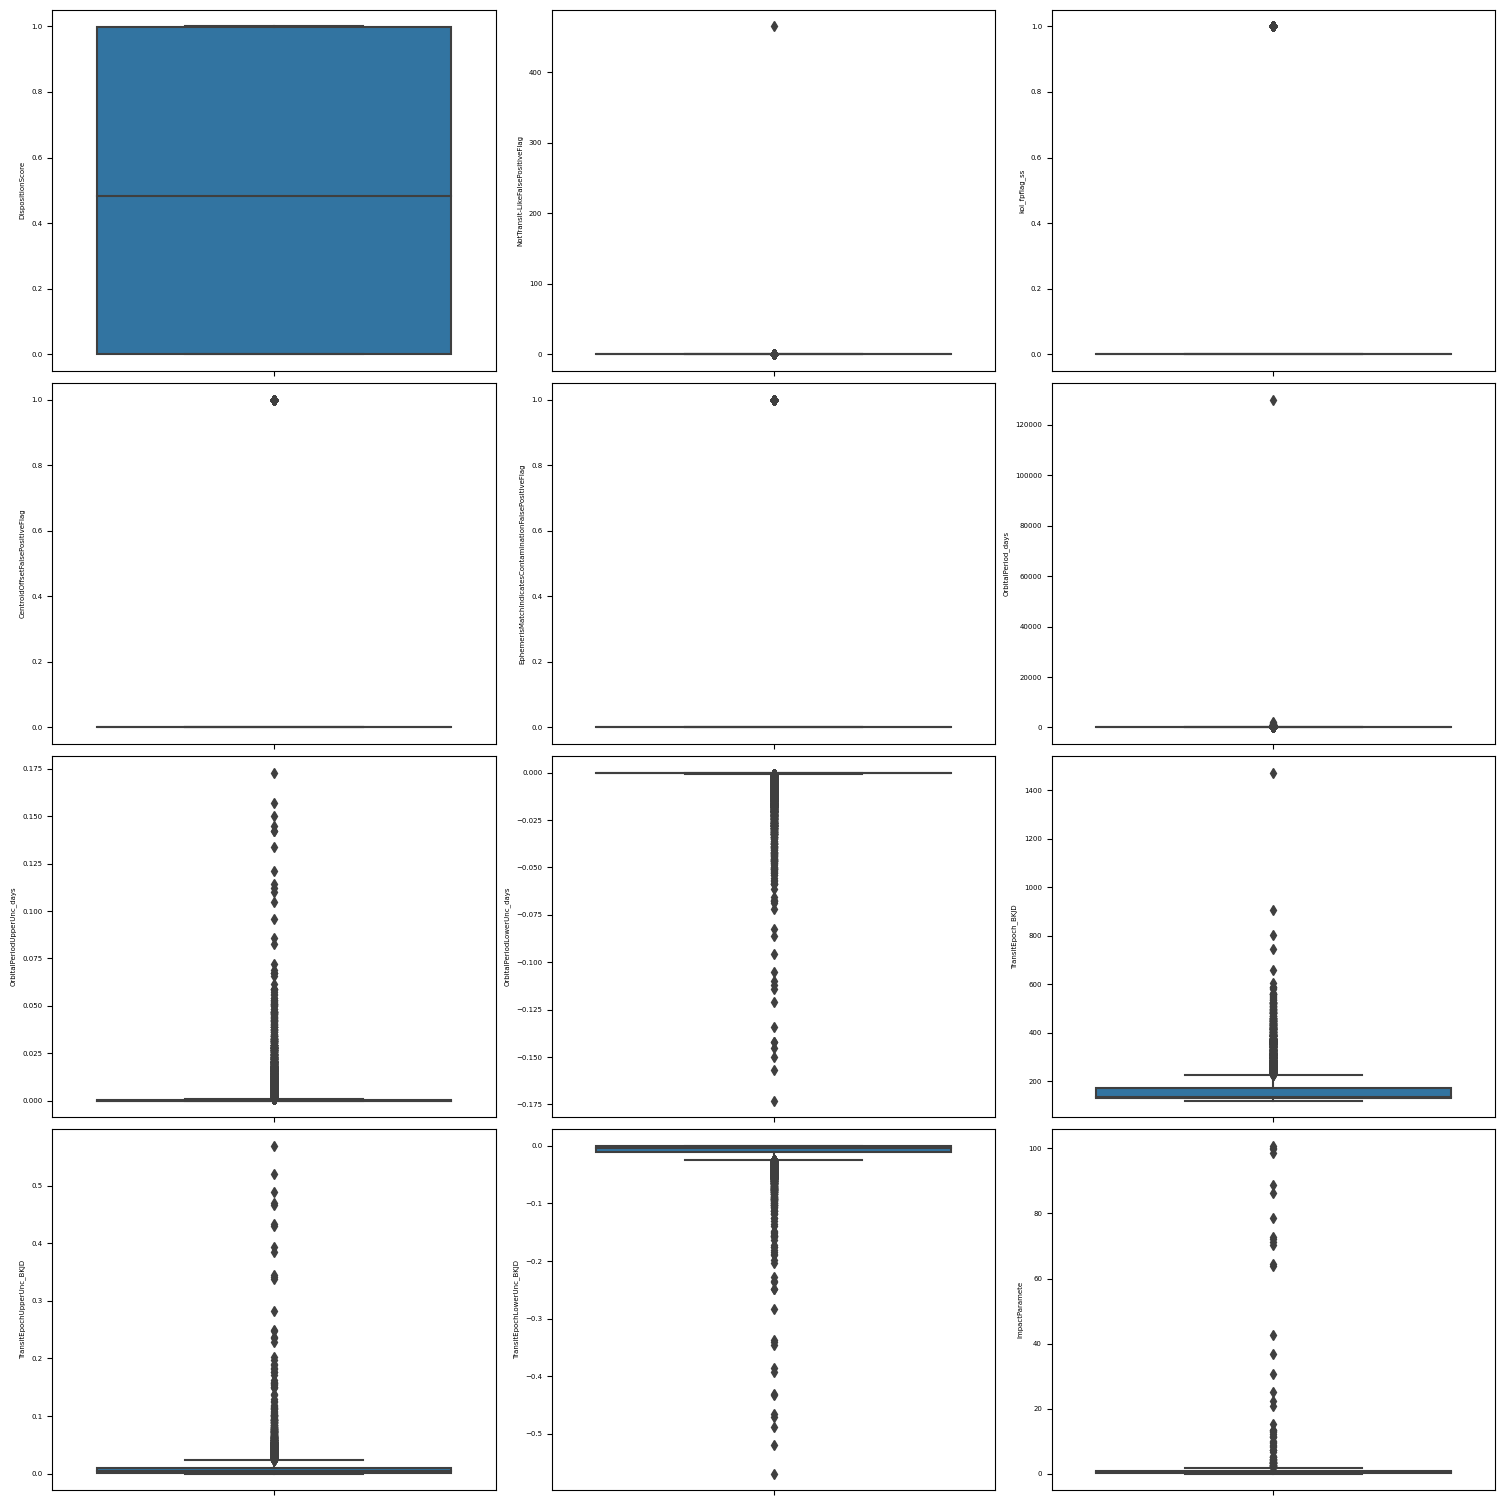

In [241]:
#Plot the boxplot for all columns to check outliers
#Choosing only float or int columns
cols = df_drop.select_dtypes(include=['float', 'int64']).columns
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
plt.rcParams.update({'font.size': 5})
#Make a boxplot for each numerical column
for i, ax in enumerate(axes.flatten()):
    sn.boxplot(y=cols[i], data=df_drop, ax=ax)
plt.tight_layout()
plt.show()

In [242]:
#another option to plot boxplot postion 2 x 2 in a grid 
#cols = df.select_dtypes(include=['float', 'int64']).columns
#for col in cols:
   # plt.figure() 
   # df.boxplot([col], grid=False, fontsize=5, figsize=(2,2))
    


Since the data doesn’t follow a normal distribution, we will calculate the outlier data points using the statistical method called interquartile range (IQR) instead of using Z-score. Using the IQR, the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. The Q1 is the 25th percentile and Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1).

In [243]:
#calculate the upper and lower bound

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [244]:
#print the upper and lower bound
for col in cols:
    lr,ur=outlier_treatment(df_drop[col])
    print(col,lr,ur)

DispositionScore nan nan
NotTransit-LikeFalsePositiveFlag 0.0 0.0
koi_fpflag_ss 0.0 0.0
CentroidOffsetFalsePositiveFlag 0.0 0.0
EphemerisMatchIndicatesContaminationFalsePositiveFlag 0.0 0.0
OrbitalPeriod_days -49.54371485999999 89.88281127599998
OrbitalPeriodUpperUnc_days -0.00040192499999999997 0.000684355
OrbitalPeriodLowerUnc_days -0.000684355 0.00040192499999999997
TransitEpoch_BKJD 76.11617875000005 227.20248474999997
TransitEpochUpperUnc_BKJD -0.012612499999999999 0.0243675
TransitEpochLowerUnc_BKJD -0.0243675 0.012612499999999999
ImpactParamete -0.839 1.9209999999999998
ImpactParameterUpperUnc -0.467 0.885
ImpactParameterLowerUnc -1.046 0.554
TransitDuration_hrs -3.326387499999999 12.0886325
TransitDurationUpperUnc_hrs -0.3975 0.8001
TransitDurationLowerUnc_hrs -0.8001 0.3975
TransitDepth_ppm -1715.0 3285.0
TransitDepthUpperUnc_ppm -48.849999999999994 106.75
TransitDepthLowerUnc_ppm -106.75 48.849999999999994
PlanetaryRadius_Earthradii -18.0625 33.8375
PlanetaryRadiusUpperUnc_Ea

Correlation Analysis: We wanted to check relationships between variables in order to decide if they were related to eachere (correclated) using correlation analysis. We calculated the correlation coefficients and visualized them using a heatmap. The correlation coefficient, often denoted as r, ranges from -1 to 1, with values closer to -1 or 1 indicating a stronger relationship and values closer to 0 indicating a weaker relationship.

<Figure size 2000x1500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

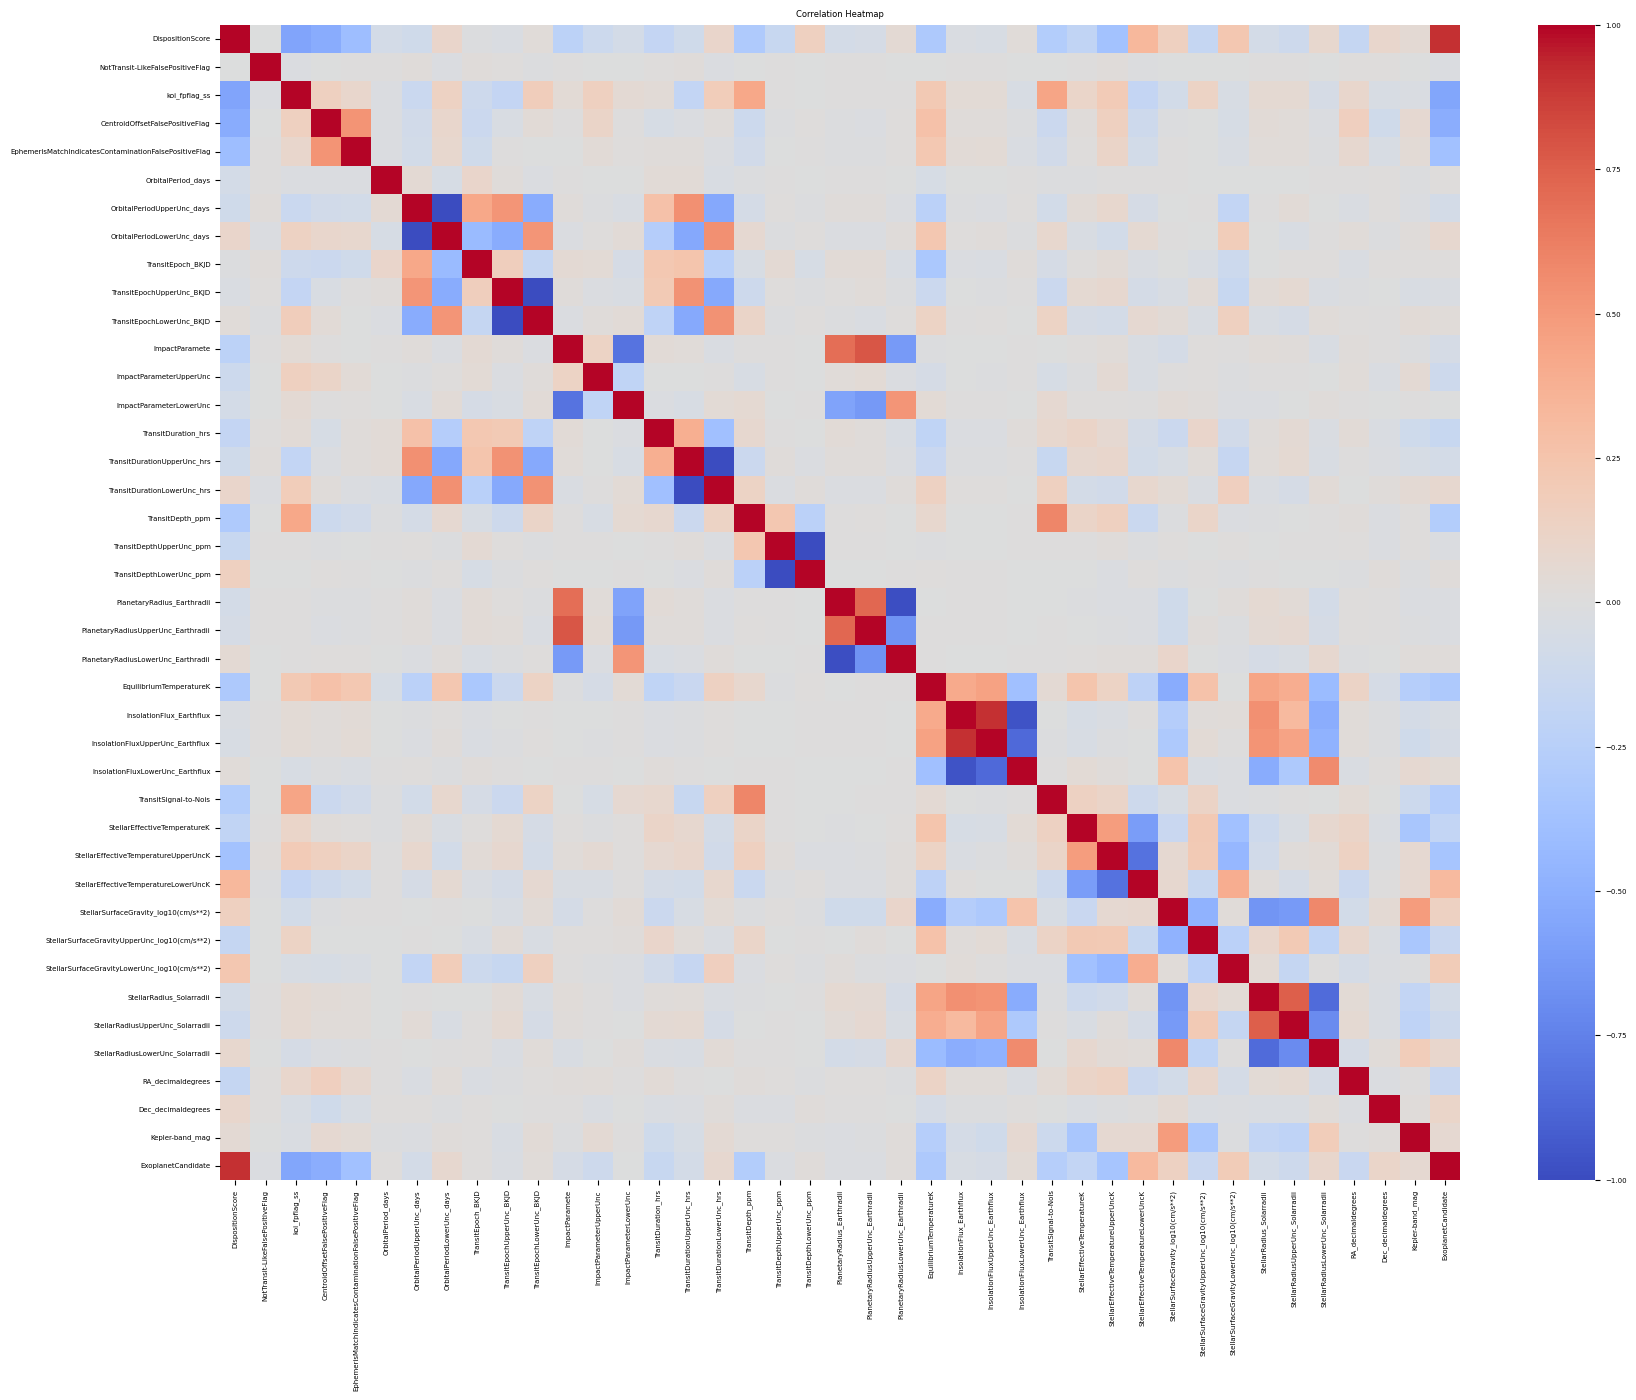

In [245]:
# Compute correlation matrix, include only float and int columns
#%matplotlib qt
%matplotlib inline
corr_matrix = df_drop.select_dtypes(include=['float', 'int64']).corr()
plt.figure(figsize=(20, 15))
# Plot correlation heatmap
sn.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Disposition Score (Koi Score) to heavily correleted to our target variable (make sense as according to Data description it is 
a calculated value) 

Drop all flags because they are calculated from the telescope data

In [246]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics  #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, classification_report, f1_score
#import KNNImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression


In [247]:
#drop DispositionUsingKeplerData
df_drop.drop(columns=['DispositionUsingKeplerData'], inplace=True)

In [248]:
def preprocessing(X, y):
    # Drop columns with more than 5% missing values
    X = X.dropna(thresh=len(X)*0.95, axis=1)

    # Make our new derivated column from previous
    X['previous_discrete'] = X['previous'].apply(lambda x: '0' if x == 0 else '>0')

    # Transform categorical variables into numbers because we are working with decision trees
    for column in X.columns:
        if X[column].dtype.kind == 'O':
            X_one_hot = pd.get_dummies(X[column], prefix=column)
            X = X.merge(X_one_hot,left_index=True,right_index=True)
            X = X.drop(columns=[column])
            
    X = X.dropna()
    y = y[X.index]
    y = y.replace({'yes':1, 'no':0})
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    return X, y

In [249]:

X_train, X_test, y_train, y_test = train_test_split(df_drop.loc[:,:'ExoplanetCandidate'], df_drop.loc[:,'ExoplanetCandidate'],  
                                                    test_size=0.2, stratify=df_drop.loc[:,'ExoplanetCandidate'], random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)


X_train.shape, X_val.shape, X_test.shape, 

((5403, 41), (1802, 41), (1802, 41))

In [250]:
def impute_missing_values(values):
    imputer = KNNImputer(n_neighbors=3)
    imputed_values = imputer.fit_transform(values)
    
    return imputed_values
 #impute missing values in the sets
X_train = impute_missing_values(X_train)
X_val = impute_missing_values(X_val)
X_test = impute_missing_values(X_test)

In [251]:
def compute_metrics(y_true,y_pred):
    accuracy = accuracy_score(y_true,y_pred)
    f1_score_1 = f1_score(y_true,y_pred,average='binary',pos_label=1)
    f1_score_0 = f1_score(y_true,y_pred,average='binary',pos_label=0)
    f1_score_macro = f1_score(y_true,y_pred,average='macro')
    return [accuracy,f1_score_1,f1_score_0,f1_score_macro]
    
    

results = pd.DataFrame(columns=['Accuracy', 'F1-score (class 1)', 'F1-score (class 0)', 'F1-score (macro avg)'])

In [252]:
def evaluation(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
results = pd.DataFrame(columns=['Accuracy', 'F1-score (class 1)', 'F1-score (class 0)', 'F1-score (macro avg)'])

#### Decision Tree

In [253]:
model_tree = DecisionTreeClassifier().fit(X_train, y_train)

In [254]:
# dot_data = export_graphviz(model_tree, out_file=None, 
#                          feature_names=X_train.columns,  
#                          class_names=['no', 'yes'],  
#                          filled=True, rounded=True,  
#                          special_characters=True, 
#                          rotate=True,
#                          proportion=True,
#                          max_depth=3)  
# graph = graphviz.Source(dot_data)  
# graph 


In [255]:
# Create an instance of the DecisionTreeClassifier
tree = DecisionTreeClassifier()

# Fitting the model to the training set
tree.fit(X_train, y_train)

# Predicting on the test set
y_pred = tree.predict(X_test)


DecisionTreeClassifier()

In [256]:
# Calculate the confusion matrix
cmx = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(cmx)


Confusion Matrix:
[[435 449]
 [448 470]]


In [257]:
print(classification_report(y_val, y_pred, target_names=['no', 'yes'],))

results

              precision    recall  f1-score   support

          no       0.49      0.49      0.49       884
         yes       0.51      0.51      0.51       918

    accuracy                           0.50      1802
   macro avg       0.50      0.50      0.50      1802
weighted avg       0.50      0.50      0.50      1802



,Accuracy,F1-score (class 1),F1-score (class 0),F1-score (macro avg)


#### Radom Forest   

In [258]:
# Instantiate the random forest classifier
forest = RandomForestClassifier(n_estimators=100, criterion='gini')

# Fit the model to the training set
forest.fit(X_train, y_train)

# Predict on the test set
y_pred = forest.predict(X_test)

# Evaluate the model
evaluation(y_test, y_pred)


RandomForestClassifier()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [259]:
# Train the random forest classifier
model_rf1 = RandomForestClassifier(oob_score=True).fit(X_train, y_train)

# Make predictions on the training set
pred = model_rf1.predict(X_train)

# Create a confusion matrix
cm = confusion_matrix(y_train, pred)
print("Confusion Matrix:")
print(cm)

# Print the classification report
classification_rep = classification_report(y_train, pred, target_names=['no', 'yes'])
print("Classification Report:")
print(classification_rep)

# Print the Accuracy
print("Accuracy_OOB =", model_rf1.oob_score_)

Confusion Matrix:
[[2649    0]
 [   0 2754]]
Classification Report:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      2649
         yes       1.00      1.00      1.00      2754

    accuracy                           1.00      5403
   macro avg       1.00      1.00      1.00      5403
weighted avg       1.00      1.00      1.00      5403

Accuracy_OOB = 1.0
